In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator


1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

<AxesSubplot: xlabel='features_2', ylabel='features_3'>

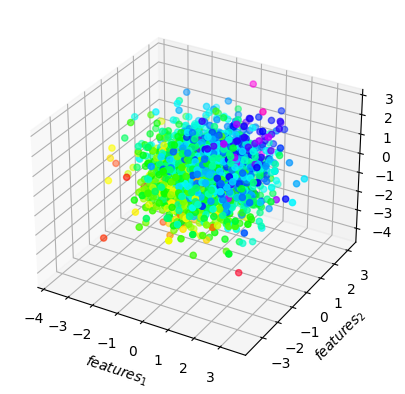

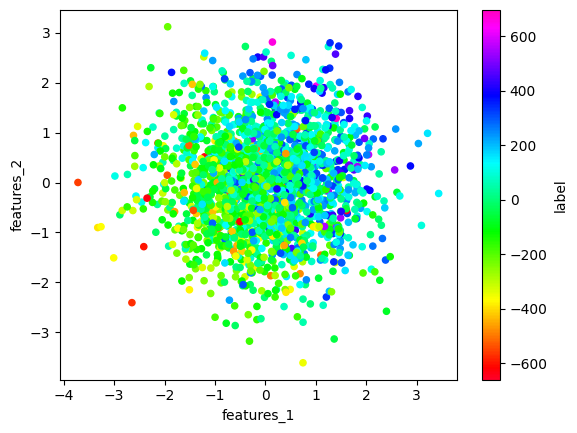

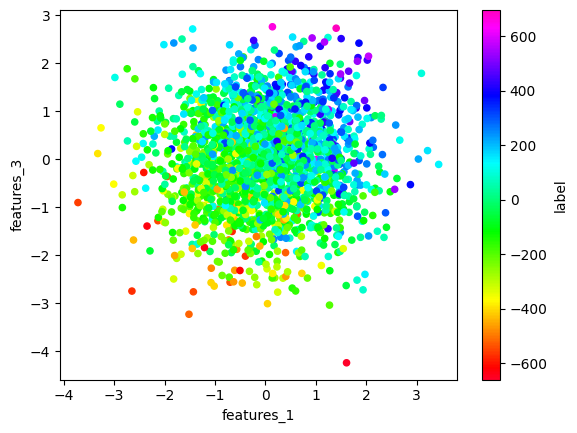

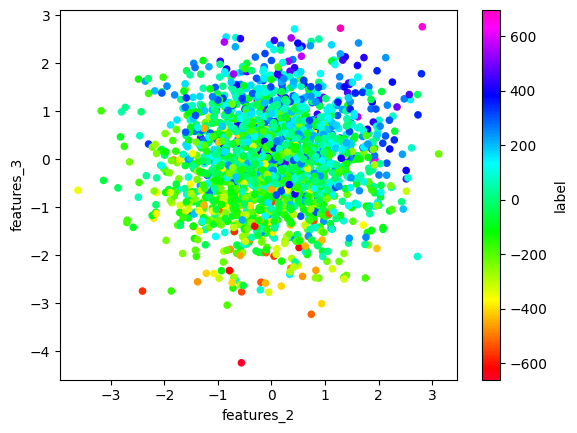

In [2]:
csv= pd.read_csv("data/regression_generated.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cm = plt.cm.get_cmap(plt.hot())
ax.scatter(csv['features_1'], csv['features_2'], csv['features_3'], c=csv['label'],cmap="gist_rainbow")
ax.set_xlabel('$features_1$')
ax.set_ylabel('$features_2$')
ax.set_zlabel('$features_3$')


csv.plot.scatter(x = 'features_1',
                y = 'features_2',
                c = 'label',
                colormap = "gist_rainbow")   
    
csv.plot.scatter(x = 'features_1',
                y = 'features_3',
                c = 'label',
                colormap = "gist_rainbow")       
        
csv.plot.scatter(x = 'features_2',
                y = 'features_3',
                c = 'label',
                colormap = "gist_rainbow")    

#Are these features correlated?
#Features are not correlated because the linear relationship is nearly zero.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

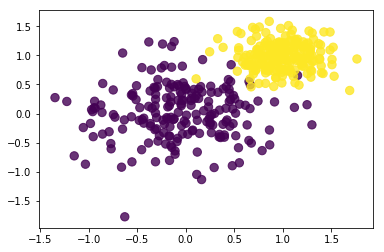

In [3]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

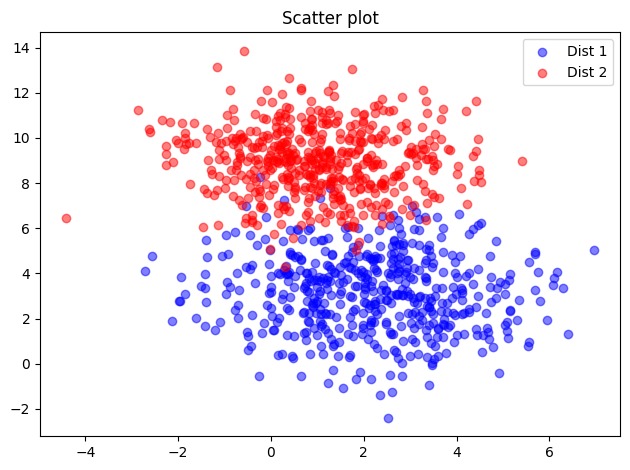

In [4]:
def data_generator(mean_dist, covariance_matrix, n):
    data1 = np.random.multivariate_normal(mean_dist[0], covariance_matrix[0], n) 
    data2 = np.random.multivariate_normal(mean_dist[1], covariance_matrix[1], n)
    return data1, data2

n = 500
data1, data2 = data_generator(([2, 3], [1, 9]), ([[3, 0], [0, 3]], [[2, 0], [0, 2]]), n)
data1 = pd.DataFrame(data1, columns = ["x", "y"])
data2 = pd.DataFrame(data2, columns = ["x", "y"])

ax = plt.figure().add_subplot(111)
ax.set_title("Scatter plot")
ax.scatter(x = "x", y = "y", c = "blue", data = data1, marker = "o", alpha = 0.5, linewidths = 1, label = "Dist 1")
ax.scatter(x = "x", y = "y", c = "red", data = data2, marker = "o", alpha = 0.5, linewidths = 1, label = "Dist 2")
ax.legend(loc = "upper right")
plt.tight_layout()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


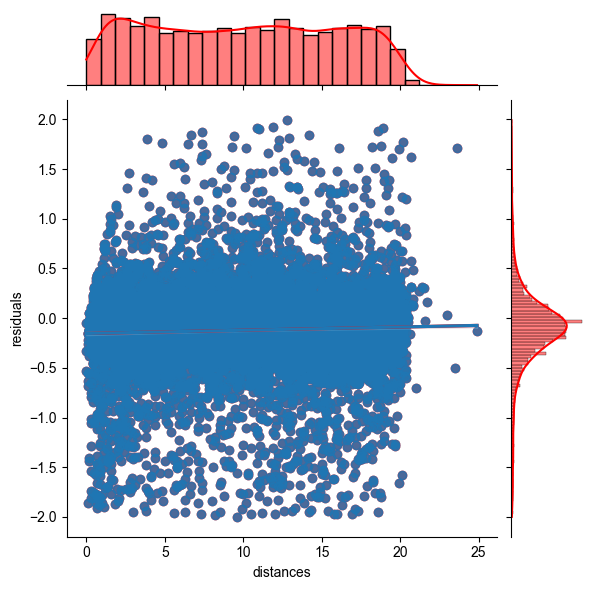

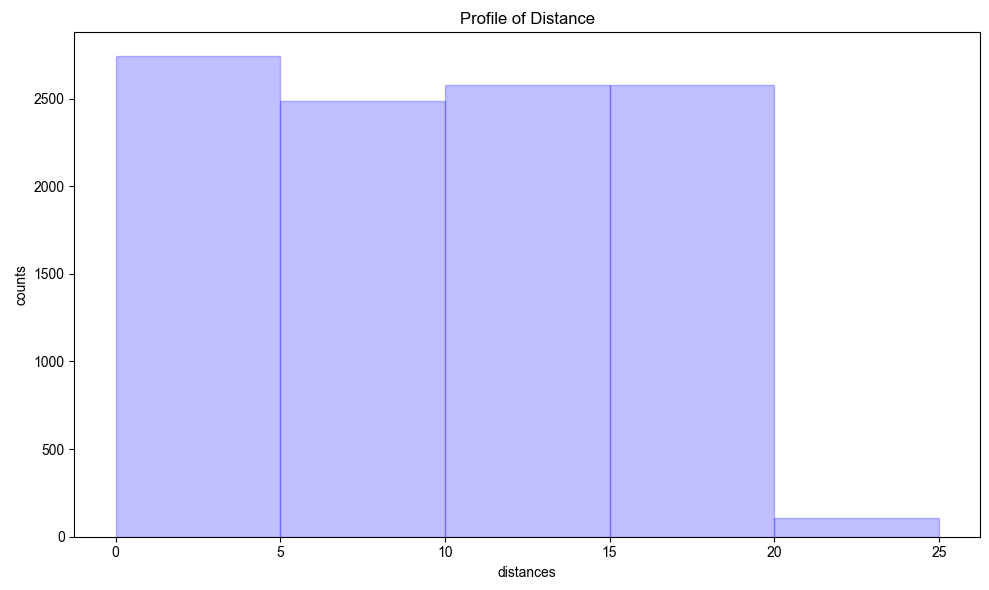

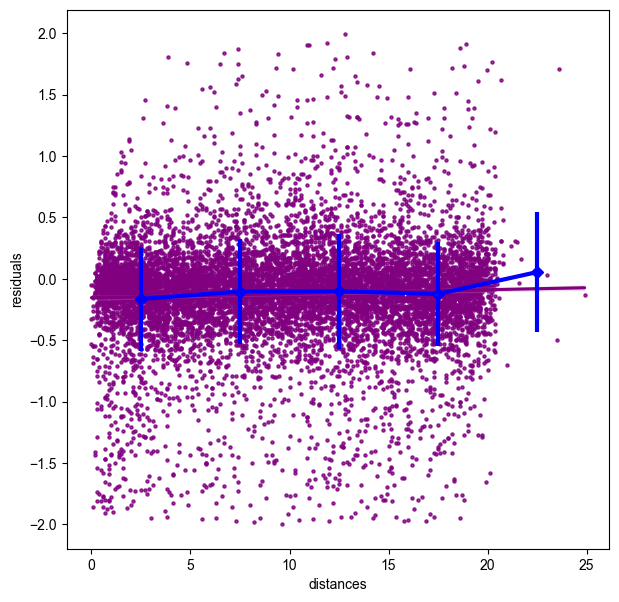

In [5]:
pkl=pd.read_pickle("data/residuals_261.pkl")
data=pd.DataFrame(pkl.item())

data = data.loc[abs(data["residuals"]) < 2]
print(data)

sns.jointplot(data=data, x="distances", y="residuals", kind="reg", color=("red"))
sns.regplot(x="distances", y="residuals", data=data)

# According to flat line there is no correlation between the 2 columns.
# Residuals column distribute as standard normal distribution
# Distances column distribute as uniform distribution 



#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning
fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(data["distances"], bins=5, alpha = 0.25, range = [0, 25], color="blue",edgecolor="blue") 

ax = fig.axes[0]
ax.set_title('Profile of Distance')
ax.set_xlabel('distances')
ax.set_ylabel('counts')
fig.tight_layout()


#Obtain 3 numpy arrays:
x = (bins[1:] + bins[:-1]) / 2 #mid point of bins

y = []
for i in range(len(bins)-1):
    yi = data[(data['distances'] >= bins[i]) & (data['distances'] <= bins[i+1])]['residuals'].mean()
    y.append(yi)
y = np.array(y)



err_y = []
for i in range(len(bins)-1):
    err_yi = data[(data['distances'] >= bins[i]) & (data['distances'] <= bins[i+1])]['residuals'].std()
    err_y.append(err_yi)
err_y = np.array(err_y)

fig, _ = plt.subplots()
fig.set_size_inches(7, 7)
sns.set(font_scale = 1.5)
ax = sns.regplot(x = "distances", y = "residuals", data = data, color = "purple", scatter_kws={"s": 5})
ax.errorbar(x = x, y = y, yerr = err_y, color = 'blue', linewidth = 3, marker='D', label = "Profile")
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\dehak\AppData\Local\Temp\ipykernel_7136\2219207400.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  err_y = np.sqrt(y)**(-1)
C:\Users\dehak\AppData\Local\Temp\ipykernel_7136\2219207400.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".k" (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(center, y, err_y, fmt = '.k', linewidth=5, marker = "o", color = 'blue')
C:\Users\dehak\AppData\Local\Temp\ipykernel_7136\2219207400.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(center, y, err_y, fmt = '.k', linewidth=5, marker = "o", color = 'blue')


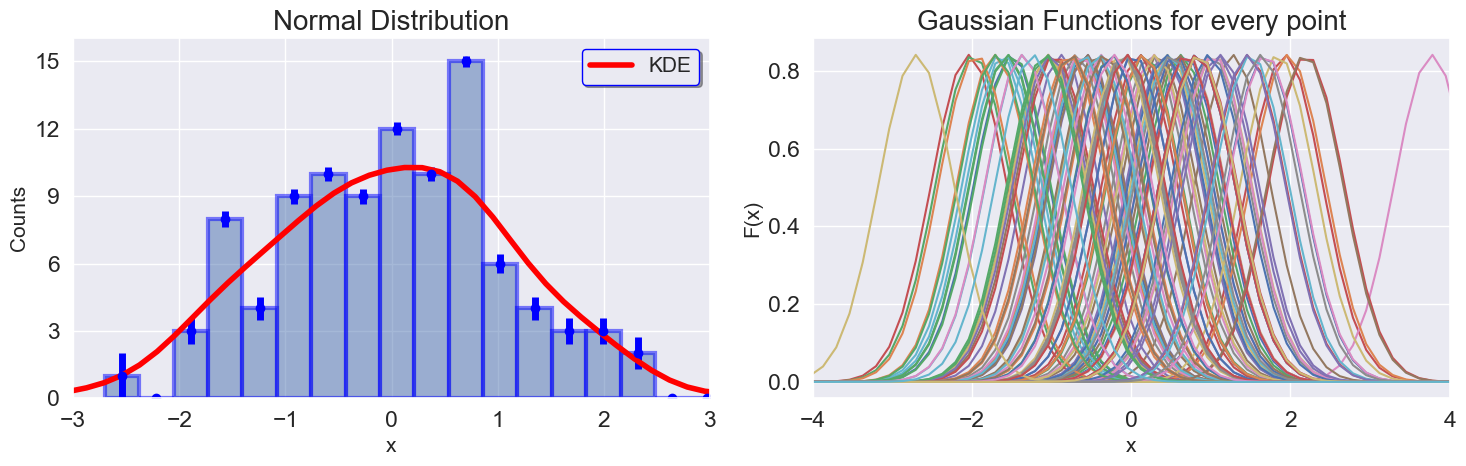

In [6]:
loc = 0
scale = 1
size = 100
x = np.random.normal(loc = loc, scale = scale, size = size)

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 5))
y, bins, patches = ax.hist(x, 20, alpha=0.5, edgecolor = 'blue', linewidth=3)

center = (bins[1:] + bins[:-1]) * 0.5
err_y = np.sqrt(y)**(-1)

ax.set_xlim(-3, 3)
ax.set_title('Normal Distribution', fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15)
ax.errorbar(center, y, err_y, fmt = '.k', linewidth=5, marker = "o", color = 'blue')
ax.yaxis.set_major_locator(MultipleLocator(3))

stdDev = 1.06 * x.std() * (len(x) ** (1/5*-1))
start = scale * (min(x) - 5)
end = scale * (max(x) + 5)
X = np.linspace(start, end, size)

g_list = []
for i in range(len(x)):
    g_list.append(norm.pdf(X, x[i], stdDev))

g_sum = np.sum(g_list, axis = 0)
g_norm = np.trapz(np.sum(g_list,axis=0), X) / np.trapz(y, x = center)
normalized_sum = g_sum/g_norm 
ax.plot(X, normalized_sum, label = 'KDE', color = 'red', linewidth = 4)
ax.legend(loc = "upper right", fontsize = 15, shadow = True, edgecolor = "blue")

for i in range(len(x)):
    ax2.plot(X, norm.pdf(X, x[i], stdDev))

ax2.set_xlim(-4, 4)
ax2.set_title('Gaussian Functions for every point', fontsize = 20)
ax2.set_xlabel("x", fontsize = 15)
ax2.set_ylabel("F(x)", fontsize = 15)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(3))
ax2.yaxis.set_major_locator(MultipleLocator(0.2))

plt.tight_layout()